In [1006]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# TRAIN DATASET

In [1007]:
train=pd.read_csv('train.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [1008]:
train.shape

(550068, 12)

In [1009]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

# Data Preprocessing

In [1010]:
train['Product_Category_1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19])

In [1011]:
train['Product_Category_1'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category_1, dtype: int64

In [1012]:
train['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [1013]:
train['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [1014]:
train['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [1015]:
train['Product_Category_3'].value_counts()

16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64

In [1016]:
train['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1000094       7
1002111       7
1004991       7
1005608       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [1017]:
# fill "nan' with 0, meaning that they bought 0 item of those categories
train['Product_Category_2']= train['Product_Category_2'].fillna(0)
train['Product_Category_3']= train['Product_Category_3'].fillna(0)
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [1018]:
train[["Product_Category_2", "Product_Category_3"]] = train[["Product_Category_2", "Product_Category_3"]].astype("int64")

In [1019]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [1020]:
train['Product_ID'].value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00312542       1
P00306942       1
P00065142       1
P00135942       1
P00013542       1
Name: Product_ID, Length: 3631, dtype: int64

In [1021]:
train['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [1022]:
train['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [1023]:
train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [1024]:
train['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [1025]:
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].replace('4+',4)
#train['Age']=train['Age'].replace('55+',55)

In [1026]:
g = {'0-17' : 1, '18-25' : 2, '26-35' : 3, '36-45' : 4, '46-50' : 5, '51-55' : 6, '55+' :7}

In [1027]:
train['Age']=train['Age'].map(g)
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,1,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,1,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,1,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,1,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,7,16,C,4,0,8,0,0,7969


# FEATURE ENGINEERING

In [1028]:
gender=pd.get_dummies(train['Gender'], drop_first=True)
city=pd.get_dummies(train['City_Category'], drop_first=True)
train.drop(['Gender', 'City_Category'], axis=1, inplace=True)
train.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,10,2,0,3,0,0,8370
1,1000001,P00248942,1,10,2,0,1,6,14,15200
2,1000001,P00087842,1,10,2,0,12,0,0,1422
3,1000001,P00085442,1,10,2,0,12,14,0,1057
4,1000002,P00285442,7,16,4,0,8,0,0,7969


In [1029]:
train=pd.concat([train, gender, city], axis=1 )
train.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,B,C
0,1000001,P00069042,1,10,2,0,3,0,0,8370,0,0,0
1,1000001,P00248942,1,10,2,0,1,6,14,15200,0,0,0
2,1000001,P00087842,1,10,2,0,12,0,0,1422,0,0,0
3,1000001,P00085442,1,10,2,0,12,14,0,1057,0,0,0
4,1000002,P00285442,7,16,4,0,8,0,0,7969,1,0,1


In [1030]:
train['Product_ID']=train['Product_ID'].str.slice(2).astype(int)
train['Stay_In_Current_City_Years']=train['Stay_In_Current_City_Years'].astype("int64")

In [1031]:
train.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,B,C
0,1000001,69042,1,10,2,0,3,0,0,8370,0,0,0
1,1000001,248942,1,10,2,0,1,6,14,15200,0,0,0
2,1000001,87842,1,10,2,0,12,0,0,1422,0,0,0
3,1000001,85442,1,10,2,0,12,14,0,1057,0,0,0
4,1000002,285442,7,16,4,0,8,0,0,7969,1,0,1


In [1032]:
train['Product_ID'].value_counts()

265242    1880
25442     1615
110742    1612
112142    1562
57642     1470
          ... 
133042       1
160742       1
353742       1
70142        1
77342        1
Name: Product_ID, Length: 3631, dtype: int64

In [1033]:
train.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,B,C
0,1000001,69042,1,10,2,0,3,0,0,8370,0,0,0
1,1000001,248942,1,10,2,0,1,6,14,15200,0,0,0
2,1000001,87842,1,10,2,0,12,0,0,1422,0,0,0
3,1000001,85442,1,10,2,0,12,14,0,1057,0,0,0
4,1000002,285442,7,16,4,0,8,0,0,7969,1,0,1


In [1034]:
avg_purchase_per_product=pd.DataFrame(train.groupby(['Product_ID'])['Purchase'].mean())
avg_purchase_per_product.reset_index(inplace=True)
avg_purchase_per_user=pd.DataFrame(train.groupby(['User_ID'])['Purchase'].mean())
avg_purchase_per_user.reset_index(inplace=True)
avg_purchase_per_product_1=pd.DataFrame(train.groupby(['Product_Category_1'])['Purchase'].mean())
avg_purchase_per_product_1.reset_index(inplace=True)
avg_purchase_per_product_2=pd.DataFrame(train.groupby(['Product_Category_2'])['Purchase'].mean())
avg_purchase_per_product_2.reset_index(inplace=True)
avg_purchase_per_product_3=pd.DataFrame(train.groupby(['Product_Category_3'])['Purchase'].mean())
avg_purchase_per_product_3.reset_index(inplace=True)
avg_purchase_per_occupation=pd.DataFrame(train.groupby(['Occupation'])['Purchase'].mean())
avg_purchase_per_occupation.reset_index(inplace=True)

In [1035]:
def create_var(data):
    data['avg_purchase_per_product']=data['Product_ID'].map(avg_purchase_per_product.set_index('Product_ID')['Purchase'])
    data['avg_purchase_per_user']=data['User_ID'].map(avg_purchase_per_user.set_index('User_ID')['Purchase'])
    data['avg_purchase_per_product_1']=data['Product_Category_1'].map(avg_purchase_per_product_1.set_index('Product_Category_1')['Purchase'])
    data['avg_purchase_per_product_2']=data['Product_Category_2'].map(avg_purchase_per_product_2.set_index('Product_Category_2')['Purchase'])
    data['avg_purchase_per_product_3']=data['Product_Category_3'].map(avg_purchase_per_product_3.set_index('Product_Category_3')['Purchase'])
    data['avg_purchase_per_occupation']=data['Occupation'].map(avg_purchase_per_occupation.set_index('Occupation')['Purchase'])
    return data

In [1036]:
train=create_var(train)
train.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,B,C,avg_purchase_per_product,avg_purchase_per_user,avg_purchase_per_product_1,avg_purchase_per_product_2,avg_purchase_per_product_3,avg_purchase_per_occupation
0,1000001,69042,1,10,2,0,3,0,0,8370,0,0,0,11870.863436,9545.514286,10096.705734,7518.695389,8221.836943,8959.355375
1,1000001,248942,1,10,2,0,1,6,14,15200,0,0,0,16304.030981,9545.514286,13606.218596,11503.551379,10052.594530,8959.355375
2,1000001,87842,1,10,2,0,12,0,0,1422,0,0,0,1237.892157,9545.514286,1350.859894,7518.695389,8221.836943,8959.355375
3,1000001,85442,1,10,2,0,12,14,0,1057,0,0,0,1455.140762,9545.514286,1350.859894,7105.264916,8221.836943,8959.355375
4,1000002,285442,7,16,4,0,8,0,0,7969,1,0,1,7692.763547,10525.610390,7498.958078,7518.695389,8221.836943,9394.464349


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

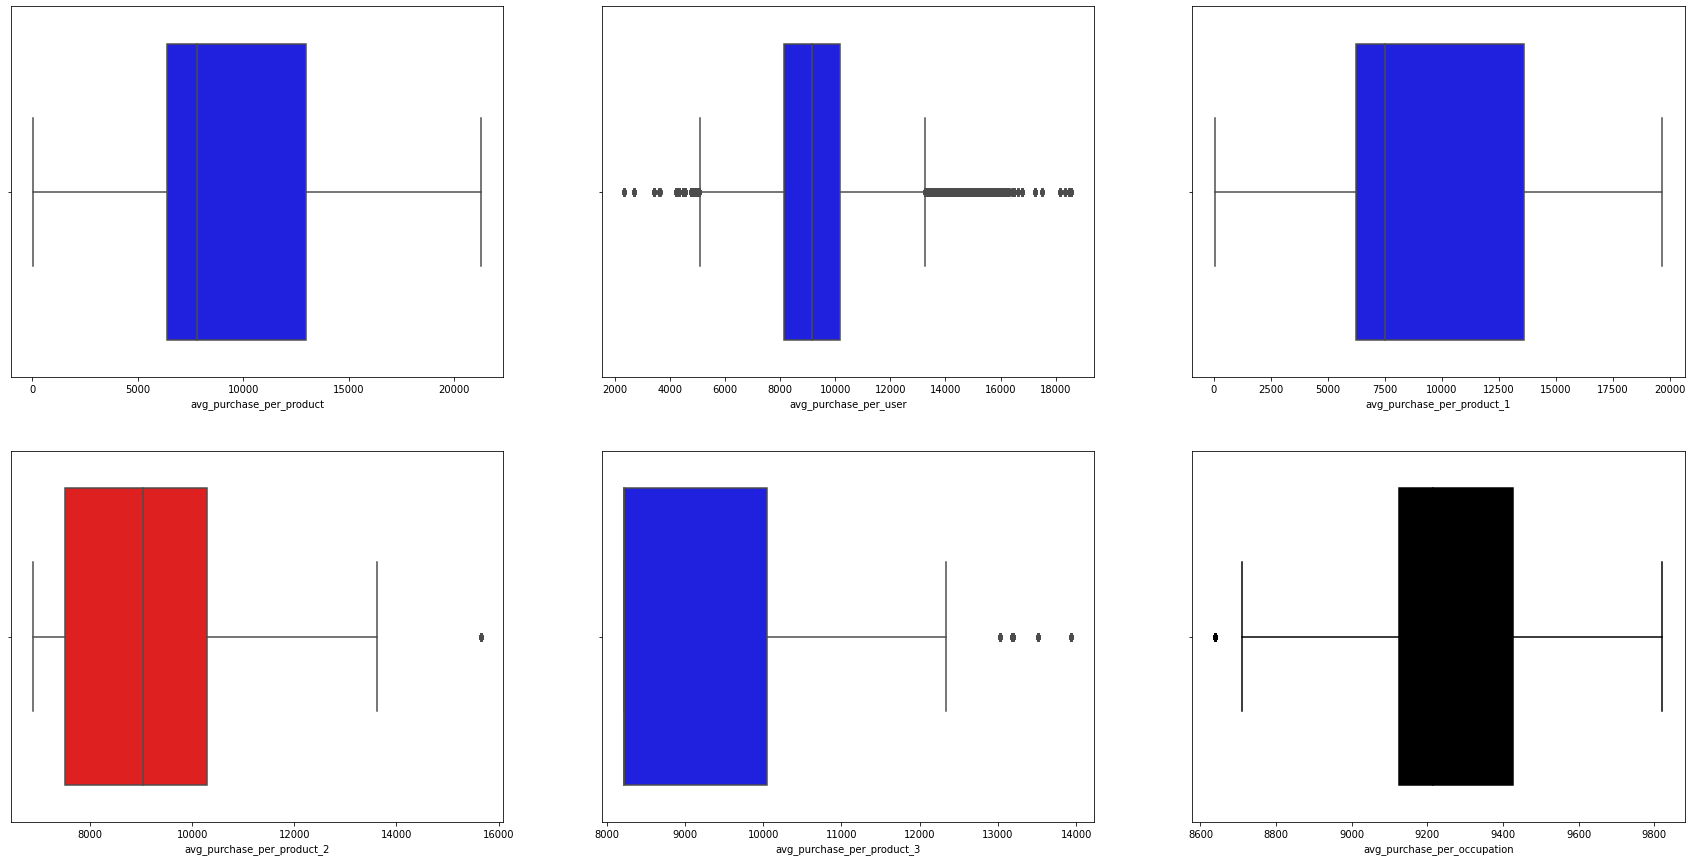

In [1037]:
fig, ax = plt.subplots(2,3,figsize = (30,15))
sns.boxplot(train['avg_purchase_per_product'], ax=ax[0,0], color = "blue")
sns.boxplot(train['avg_purchase_per_user'], ax=ax[0,1], color = "blue")
sns.boxplot(train['avg_purchase_per_product_1'], ax=ax[0,2], color = "blue")
sns.boxplot(train['avg_purchase_per_product_2'], ax=ax[1,0], color = "red")
sns.boxplot(train['avg_purchase_per_product_3'], ax=ax[1,1], color = "blue")
sns.boxplot(train['avg_purchase_per_occupation'], ax=ax[1,2], color = "black")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

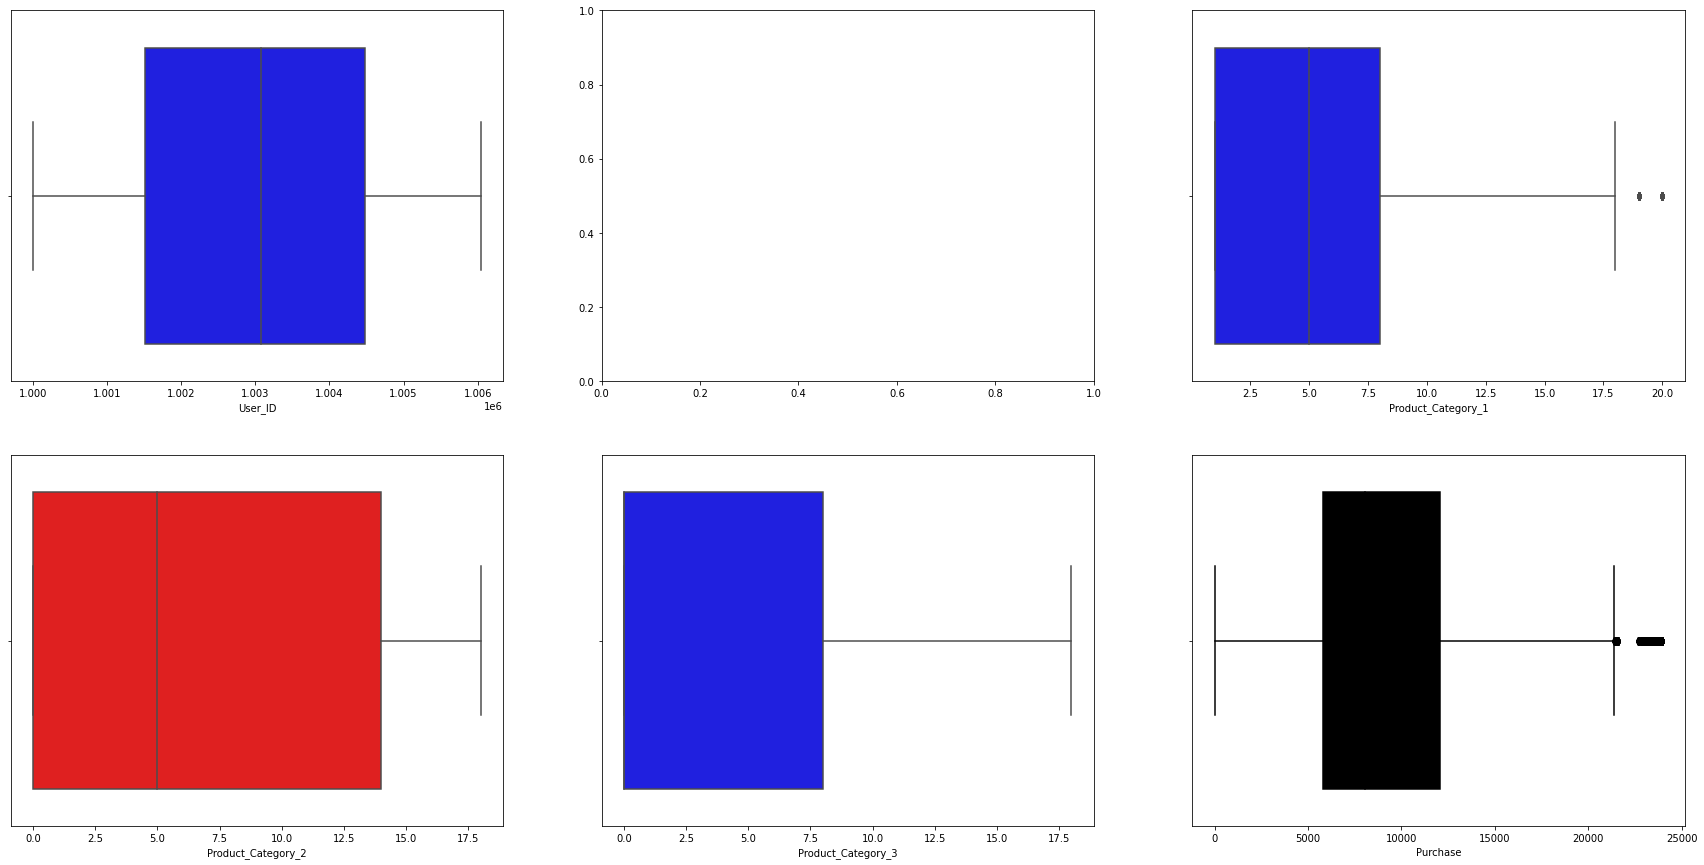

In [1038]:
fig, ax = plt.subplots(2,3,figsize = (30,15))
sns.boxplot(train['User_ID'], ax=ax[0,0], color = "blue")

sns.boxplot(train['Product_Category_1'], ax=ax[0,2], color = "blue")
sns.boxplot(train['Product_Category_2'], ax=ax[1,0], color = "red")
sns.boxplot(train['Product_Category_3'], ax=ax[1,1], color = "blue")
sns.boxplot(train['Purchase'], ax=ax[1,2], color = "black")

In [1039]:
train[(train["Purchase"] > 21000)]

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,B,C,avg_purchase_per_product,avg_purchase_per_user,avg_purchase_per_product_1,avg_purchase_per_product_2,avg_purchase_per_product_3,avg_purchase_per_occupation
343,1000058,117642,3,2,3,0,10,16,0,23603,1,1,0,20400.283544,11098.988506,19675.570927,10295.681933,8221.836943,8952.481683
375,1000062,119342,4,3,1,0,10,13,0,23792,0,0,0,20448.756494,8913.539007,19675.570927,9683.352388,8221.836943,9178.593088
652,1000126,87042,2,9,1,0,10,14,16,23233,1,1,0,20113.225000,11120.400000,19675.570927,7105.264916,11981.890642,8637.743761
731,1000139,20142,3,20,2,0,7,0,0,21002,0,0,1,15179.836735,10953.094891,16365.689600,7518.695389,8221.836943,8836.494905
736,1000139,159542,3,20,2,0,10,15,16,23595,0,0,1,18153.741414,10953.094891,19675.570927,10357.077691,11981.890642,8836.494905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545101,1005915,174242,2,4,0,0,15,16,0,21101,1,0,1,15788.544073,10272.287500,14780.451828,10295.681933,8221.836943,9213.980251
545663,1006002,116142,6,0,1,1,10,13,16,23663,1,0,1,20463.791277,10128.901099,19675.570927,9683.352388,11981.890642,9124.428588
545664,1006002,71442,6,0,1,1,15,17,0,21310,1,0,1,18951.667571,10128.901099,14780.451828,9421.576577,8221.836943,9124.428588
545787,1006018,52842,4,1,3,0,10,15,0,23496,1,0,1,20141.139511,11897.378049,19675.570927,10357.077691,8221.836943,8953.193270


In [1040]:
train = train.drop(train[(train["Purchase"] > 21000)].index)
train.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,B,C,avg_purchase_per_product,avg_purchase_per_user,avg_purchase_per_product_1,avg_purchase_per_product_2,avg_purchase_per_product_3,avg_purchase_per_occupation
0,1000001,69042,1,10,2,0,3,0,0,8370,0,0,0,11870.863436,9545.514286,10096.705734,7518.695389,8221.836943,8959.355375
1,1000001,248942,1,10,2,0,1,6,14,15200,0,0,0,16304.030981,9545.514286,13606.218596,11503.551379,10052.594530,8959.355375
2,1000001,87842,1,10,2,0,12,0,0,1422,0,0,0,1237.892157,9545.514286,1350.859894,7518.695389,8221.836943,8959.355375
3,1000001,85442,1,10,2,0,12,14,0,1057,0,0,0,1455.140762,9545.514286,1350.859894,7105.264916,8221.836943,8959.355375
4,1000002,285442,7,16,4,0,8,0,0,7969,1,0,1,7692.763547,10525.610390,7498.958078,7518.695389,8221.836943,9394.464349


In [1041]:
train[(train["Product_Category_1"] > 18)]

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,B,C,avg_purchase_per_product,avg_purchase_per_user,avg_purchase_per_product_1,avg_purchase_per_product_2,avg_purchase_per_product_3,avg_purchase_per_occupation
545915,1000001,375436,1,10,2,0,20,0,0,612,0,0,0,374.266585,9545.514286,370.481176,7518.695389,8221.836943,8959.355375
545916,1000002,372445,7,16,4,0,20,0,0,119,1,0,1,374.930705,10525.610390,370.481176,7518.695389,8221.836943,9394.464349
545917,1000004,375436,5,7,2,1,20,0,0,481,1,1,0,374.266585,14747.714286,370.481176,7518.695389,8221.836943,9425.728223
545918,1000006,375436,6,9,1,0,20,0,0,480,0,0,0,374.266585,8083.617021,370.481176,7518.695389,8221.836943,8637.743761
545919,1000007,372445,4,1,1,1,20,0,0,241,1,1,0,374.930705,13804.000000,370.481176,7518.695389,8221.836943,8953.193270
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,372445,6,13,1,1,20,0,0,368,1,1,0,374.930705,13940.083333,370.481176,7518.695389,8221.836943,9306.351061
550064,1006035,375436,3,1,3,0,20,0,0,371,0,0,1,374.266585,6293.717105,370.481176,7518.695389,8221.836943,8953.193270
550065,1006036,375436,3,15,4,1,20,0,0,137,0,1,0,374.266585,8007.894942,370.481176,7518.695389,8221.836943,9778.891163
550066,1006038,375436,7,1,2,0,20,0,0,365,0,0,1,374.266585,7502.833333,370.481176,7518.695389,8221.836943,8953.193270


In [1042]:
train = train.drop(train[(train["Product_Category_1"] > 18)].index)
train.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,B,C,avg_purchase_per_product,avg_purchase_per_user,avg_purchase_per_product_1,avg_purchase_per_product_2,avg_purchase_per_product_3,avg_purchase_per_occupation
0,1000001,69042,1,10,2,0,3,0,0,8370,0,0,0,11870.863436,9545.514286,10096.705734,7518.695389,8221.836943,8959.355375
1,1000001,248942,1,10,2,0,1,6,14,15200,0,0,0,16304.030981,9545.514286,13606.218596,11503.551379,10052.594530,8959.355375
2,1000001,87842,1,10,2,0,12,0,0,1422,0,0,0,1237.892157,9545.514286,1350.859894,7518.695389,8221.836943,8959.355375
3,1000001,85442,1,10,2,0,12,14,0,1057,0,0,0,1455.140762,9545.514286,1350.859894,7105.264916,8221.836943,8959.355375
4,1000002,285442,7,16,4,0,8,0,0,7969,1,0,1,7692.763547,10525.610390,7498.958078,7518.695389,8221.836943,9394.464349


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

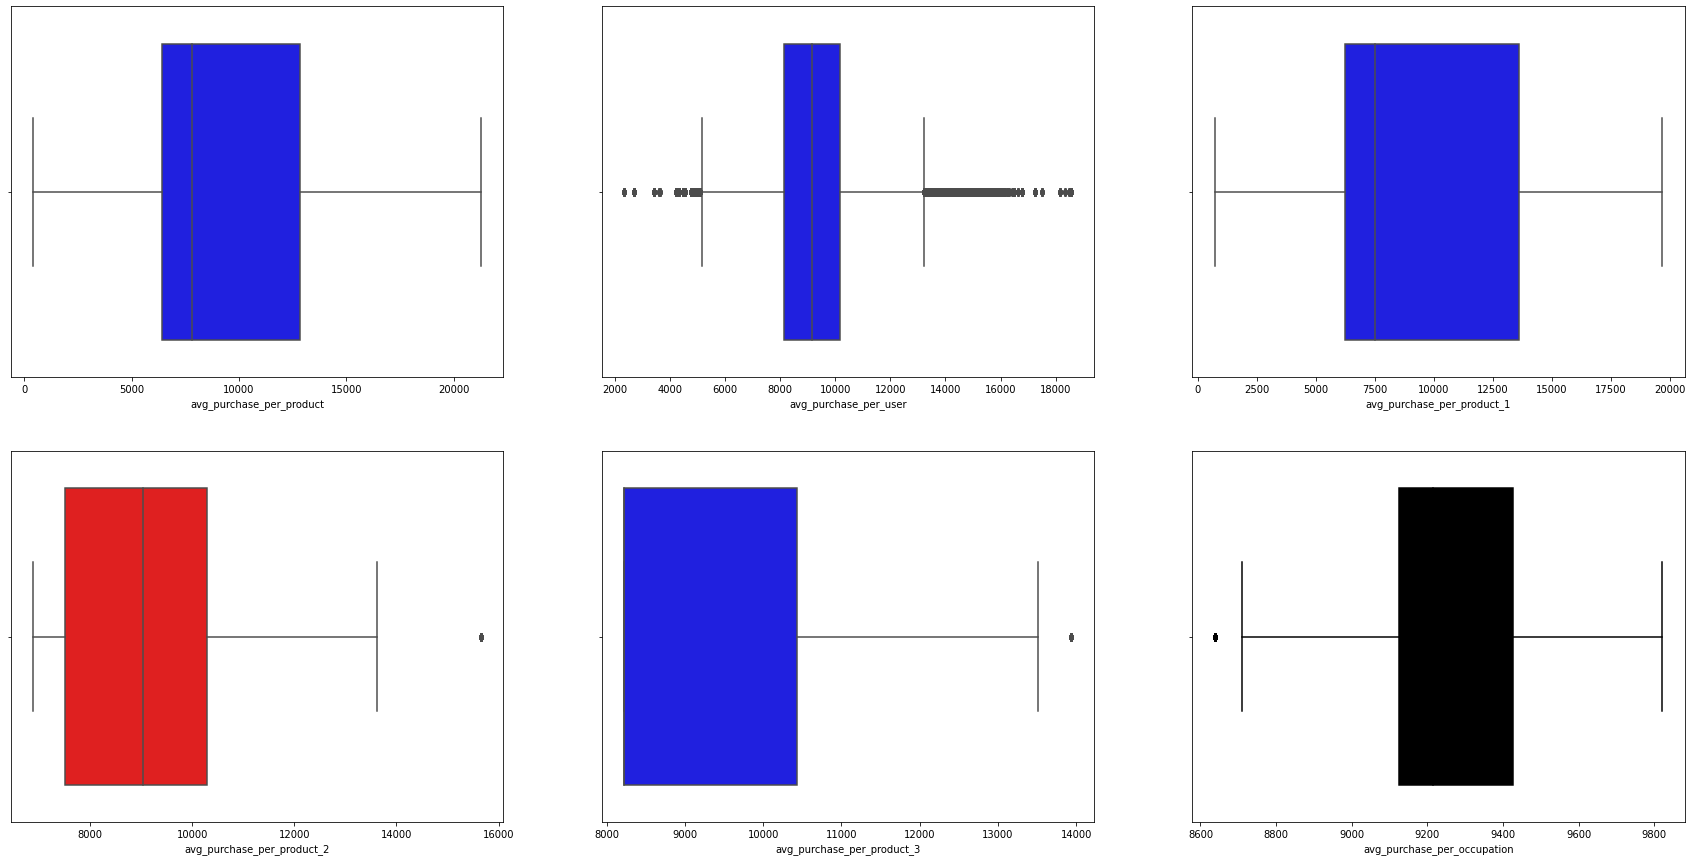

In [1043]:
fig, ax = plt.subplots(2,3,figsize = (30,15))
sns.boxplot(train['avg_purchase_per_product'], ax=ax[0,0], color = "blue")
sns.boxplot(train['avg_purchase_per_user'], ax=ax[0,1], color = "blue")
sns.boxplot(train['avg_purchase_per_product_1'], ax=ax[0,2], color = "blue")
sns.boxplot(train['avg_purchase_per_product_2'], ax=ax[1,0], color = "red")
sns.boxplot(train['avg_purchase_per_product_3'], ax=ax[1,1], color = "blue")
sns.boxplot(train['avg_purchase_per_occupation'], ax=ax[1,2], color = "black")

In [1044]:
train.loc[train['avg_purchase_per_user']<5100, 'avg_purchase_per_user'] = 5100
train.loc[train['avg_purchase_per_user']>13000, 'avg_purchase_per_user'] = 12900
train.loc[train['avg_purchase_per_product_2']>13700, 'avg_purchase_per_product_2'] = 13700
train.loc[train['avg_purchase_per_product_3']>12400, 'avg_purchase_per_product_3'] = 12400
train.loc[train['avg_purchase_per_occupation']<8750, 'avg_purchase_per_occupation'] = 8750
train.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,B,C,avg_purchase_per_product,avg_purchase_per_user,avg_purchase_per_product_1,avg_purchase_per_product_2,avg_purchase_per_product_3,avg_purchase_per_occupation
0,1000001,69042,1,10,2,0,3,0,0,8370,0,0,0,11870.863436,9545.514286,10096.705734,7518.695389,8221.836943,8959.355375
1,1000001,248942,1,10,2,0,1,6,14,15200,0,0,0,16304.030981,9545.514286,13606.218596,11503.551379,10052.594530,8959.355375
2,1000001,87842,1,10,2,0,12,0,0,1422,0,0,0,1237.892157,9545.514286,1350.859894,7518.695389,8221.836943,8959.355375
3,1000001,85442,1,10,2,0,12,14,0,1057,0,0,0,1455.140762,9545.514286,1350.859894,7105.264916,8221.836943,8959.355375
4,1000002,285442,7,16,4,0,8,0,0,7969,1,0,1,7692.763547,10525.610390,7498.958078,7518.695389,8221.836943,9394.464349


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

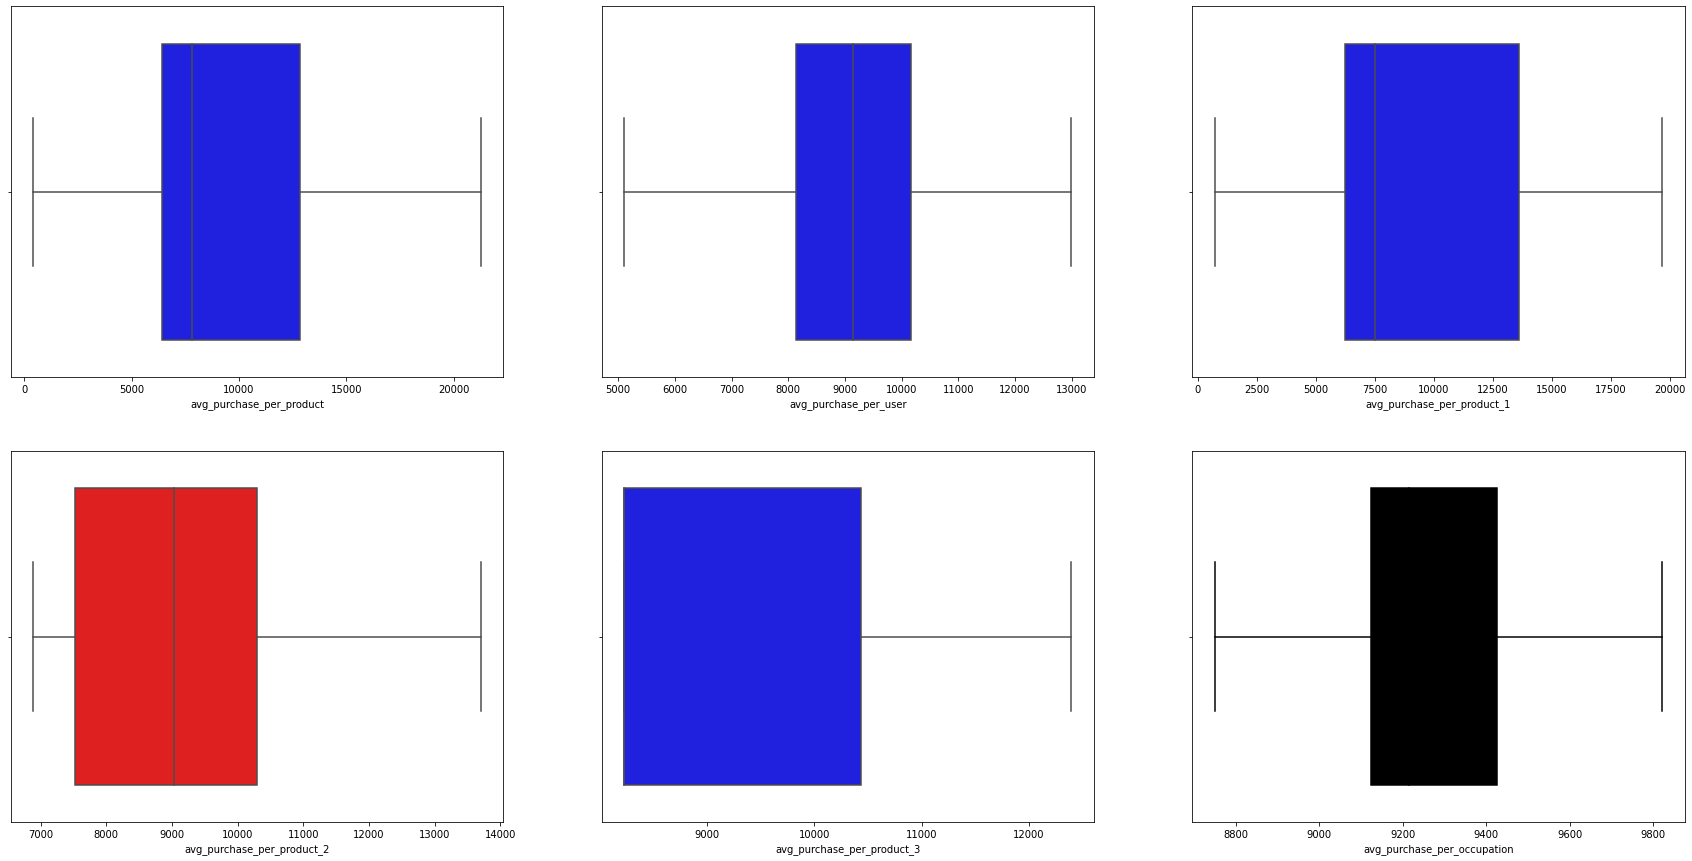

In [1045]:
fig, ax = plt.subplots(2,3,figsize = (30,15))
sns.boxplot(train['avg_purchase_per_product'], ax=ax[0,0], color = "blue")
sns.boxplot(train['avg_purchase_per_user'], ax=ax[0,1], color = "blue")
sns.boxplot(train['avg_purchase_per_product_1'], ax=ax[0,2], color = "blue")
sns.boxplot(train['avg_purchase_per_product_2'], ax=ax[1,0], color = "red")
sns.boxplot(train['avg_purchase_per_product_3'], ax=ax[1,1], color = "blue")
sns.boxplot(train['avg_purchase_per_occupation'], ax=ax[1,2], color = "black")

In [1046]:
train.shape

(542374, 19)

In [1047]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542374 entries, 0 to 545914
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   User_ID                      542374 non-null  int64  
 1   Product_ID                   542374 non-null  int64  
 2   Age                          542374 non-null  int64  
 3   Occupation                   542374 non-null  int64  
 4   Stay_In_Current_City_Years   542374 non-null  int64  
 5   Marital_Status               542374 non-null  int64  
 6   Product_Category_1           542374 non-null  int64  
 7   Product_Category_2           542374 non-null  int64  
 8   Product_Category_3           542374 non-null  int64  
 9   Purchase                     542374 non-null  int64  
 10  M                            542374 non-null  uint8  
 11  B                            542374 non-null  uint8  
 12  C                            542374 non-null  uint8  
 13 

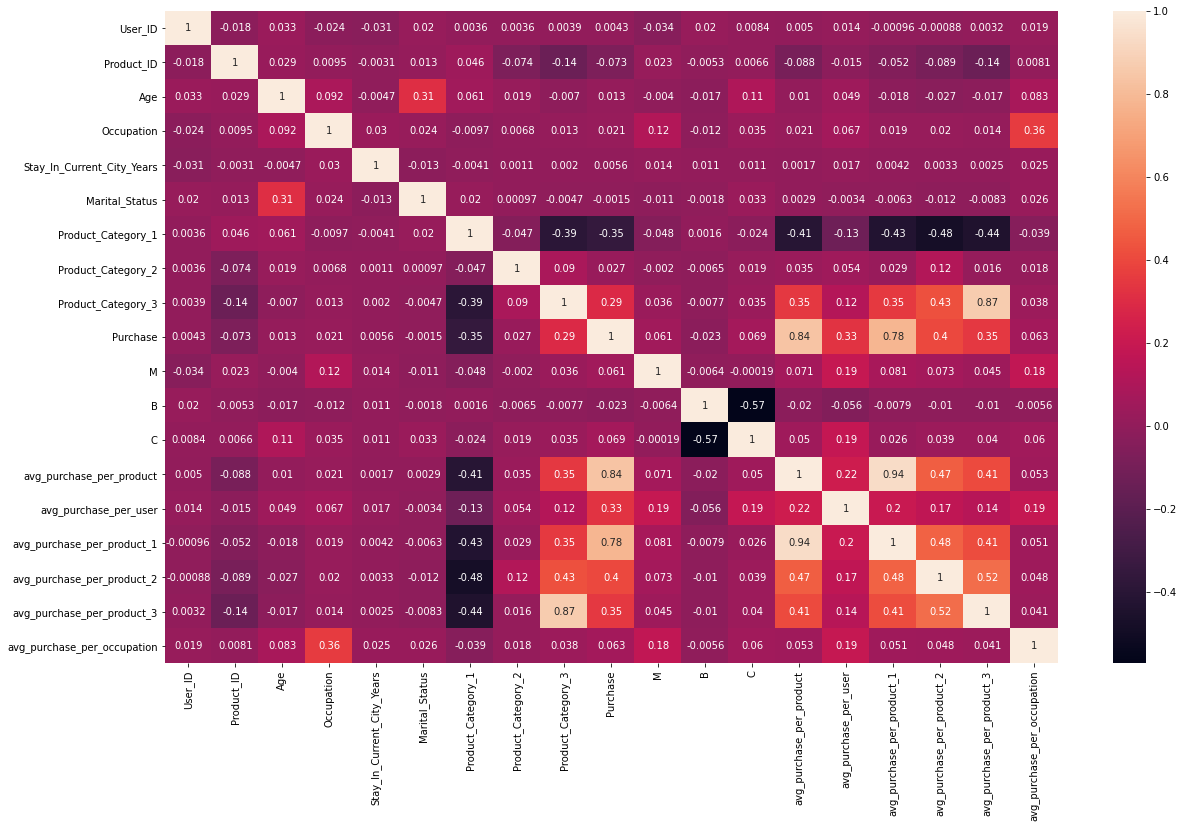

In [1048]:
corr=train.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True)

# TEST DATASET 

In [1049]:
test1 = pd.read_csv('test.csv')
test1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [1050]:
test=test1

In [1051]:
test.shape

(233599, 11)

In [1052]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [1053]:
test['Product_Category_2'].mode()

0    8.0
dtype: float64

In [1054]:
test['Product_Category_3'].mode()

0    16.0
dtype: float64

In [1055]:
# fill "nan' with 0, meaning that they bought 0 item of those categories
test['Product_Category_2']= test['Product_Category_2'].fillna(0)
test['Product_Category_3']= test['Product_Category_3'].fillna(0)
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,0.0
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,0.0
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,0.0
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,0.0
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [1056]:
test[["Product_Category_2", "Product_Category_3"]] = test[["Product_Category_2", "Product_Category_3"]].astype("int64")
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11,0
1,1000009,P00113442,M,26-35,17,C,0,0,3,5,0
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14,0
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9,0
4,1000011,P00053842,F,26-35,1,C,1,0,4,5,12


In [1057]:
test['Age'].value_counts()

26-35    93428
36-45    46711
18-25    42293
46-50    19577
51-55    16283
55+       9075
0-17      6232
Name: Age, dtype: int64

In [1058]:
test['Stay_In_Current_City_Years'].value_counts()

1     82604
2     43589
3     40143
4+    35945
0     31318
Name: Stay_In_Current_City_Years, dtype: int64

In [1059]:
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].replace('4+',4)

In [1060]:
g = {'0-17' : 1, '18-25' : 2, '26-35' : 3, '36-45' : 4, '46-50' : 5, '51-55' : 6, '55+' :7}
test['Age']=test['Age'].map(g)
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,5,7,B,2,1,1,11,0
1,1000009,P00113442,M,3,17,C,0,0,3,5,0
2,1000010,P00288442,F,4,1,B,4,1,5,14,0
3,1000010,P00145342,F,4,1,B,4,1,4,9,0
4,1000011,P00053842,F,3,1,C,1,0,4,5,12


In [1061]:
test['Product_ID']=test['Product_ID'].str.slice(2).astype(int)
test['Stay_In_Current_City_Years']=test['Stay_In_Current_City_Years'].astype('int64')
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,128942,M,5,7,B,2,1,1,11,0
1,1000009,113442,M,3,17,C,0,0,3,5,0
2,1000010,288442,F,4,1,B,4,1,5,14,0
3,1000010,145342,F,4,1,B,4,1,4,9,0
4,1000011,53842,F,3,1,C,1,0,4,5,12


In [1062]:
gender=pd.get_dummies(test['Gender'], drop_first=True)
city=pd.get_dummies(test['City_Category'], drop_first=True)
test.drop(['Gender', 'City_Category'], axis=1, inplace=True)
test.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,128942,5,7,2,1,1,11,0
1,1000009,113442,3,17,0,0,3,5,0
2,1000010,288442,4,1,4,1,5,14,0
3,1000010,145342,4,1,4,1,4,9,0
4,1000011,53842,3,1,1,0,4,5,12


In [1063]:
test=pd.concat([test, gender, city], axis=1 )
test.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,M,B,C
0,1000004,128942,5,7,2,1,1,11,0,1,1,0
1,1000009,113442,3,17,0,0,3,5,0,1,0,1
2,1000010,288442,4,1,4,1,5,14,0,0,1,0
3,1000010,145342,4,1,4,1,4,9,0,0,1,0
4,1000011,53842,3,1,1,0,4,5,12,0,0,1


In [1064]:
test=create_var(test)
test.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,M,B,C,avg_purchase_per_product,avg_purchase_per_user,avg_purchase_per_product_1,avg_purchase_per_product_2,avg_purchase_per_product_3,avg_purchase_per_occupation
0,1000004,128942,5,7,2,1,1,11,0,1,1,0,15781.118590,14747.714286,13606.218596,8940.580515,8221.836943,9425.728223
1,1000009,113442,3,17,0,0,3,5,0,1,0,1,11746.665354,10243.086207,10096.705734,9027.821574,8221.836943,9821.478236
2,1000010,288442,4,1,4,1,5,14,0,0,1,0,5731.338028,9728.744395,6240.088178,7105.264916,8221.836943,8953.193270
3,1000010,145342,4,1,4,1,4,9,0,0,1,0,1943.266667,9728.744395,2329.659491,7277.006851,8221.836943,8953.193270
4,1000011,53842,3,1,1,0,4,5,12,0,0,1,2585.590829,7957.471429,2329.659491,9027.821574,8715.512762,8953.193270


In [1065]:
test.isnull().sum()

User_ID                         0
Product_ID                      0
Age                             0
Occupation                      0
Stay_In_Current_City_Years      0
Marital_Status                  0
Product_Category_1              0
Product_Category_2              0
Product_Category_3              0
M                               0
B                               0
C                               0
avg_purchase_per_product       61
avg_purchase_per_user           0
avg_purchase_per_product_1      0
avg_purchase_per_product_2      0
avg_purchase_per_product_3      0
avg_purchase_per_occupation     0
dtype: int64

In [1066]:
test['avg_purchase_per_product'].mode()

0    7534.848404
dtype: float64

In [1067]:
test.fillna(7534.848404,inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

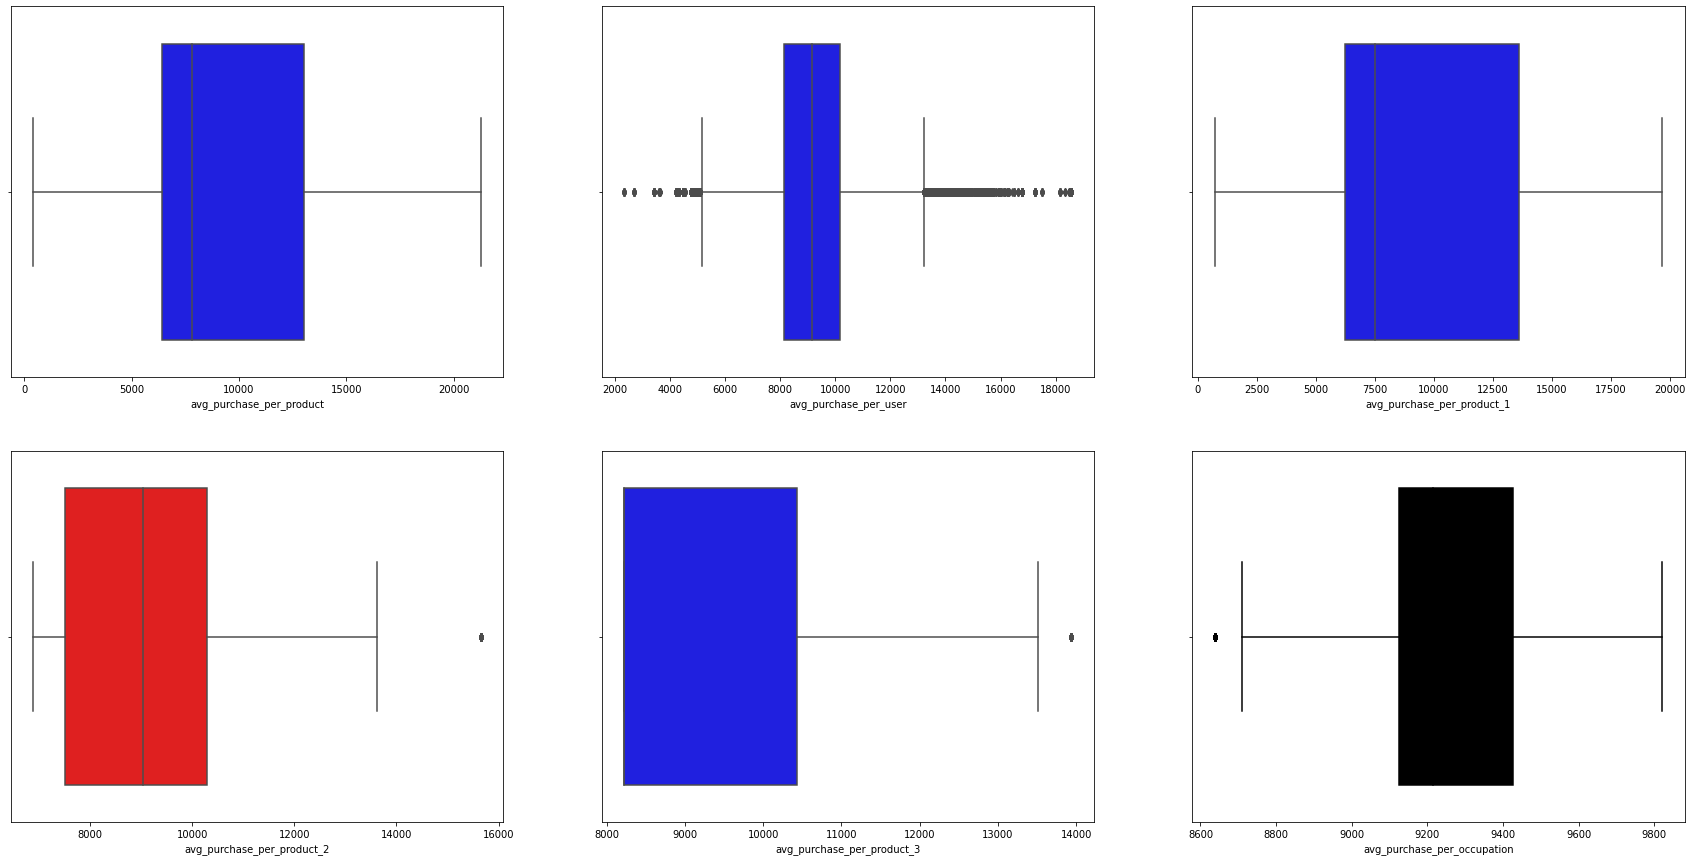

In [1068]:
fig, ax = plt.subplots(2,3,figsize = (30,15))
sns.boxplot(test['avg_purchase_per_product'], ax=ax[0,0], color = "blue")
sns.boxplot(test['avg_purchase_per_user'], ax=ax[0,1], color = "blue")
sns.boxplot(test['avg_purchase_per_product_1'], ax=ax[0,2], color = "blue")
sns.boxplot(test['avg_purchase_per_product_2'], ax=ax[1,0], color = "red")
sns.boxplot(test['avg_purchase_per_product_3'], ax=ax[1,1], color = "blue")
sns.boxplot(test['avg_purchase_per_occupation'], ax=ax[1,2], color = "black")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

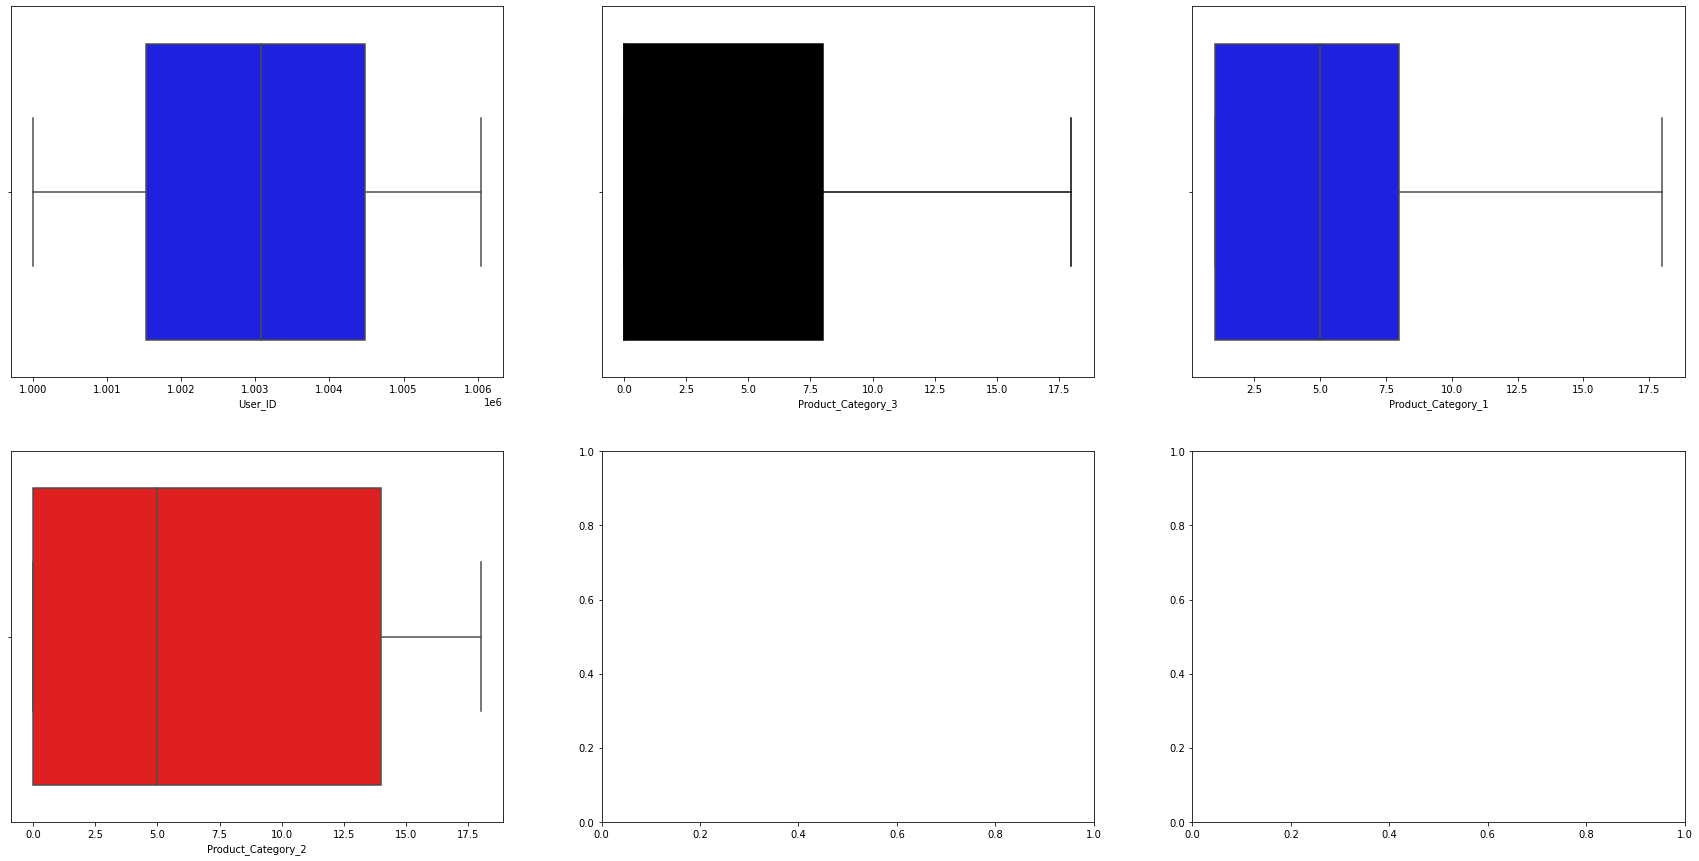

In [1069]:
fig, ax = plt.subplots(2,3,figsize = (30,15))
sns.boxplot(test['User_ID'], ax=ax[0,0], color = "blue")
sns.boxplot(test['Product_Category_3'], ax=ax[0,1], color = "black")
sns.boxplot(test['Product_Category_1'], ax=ax[0,2], color = "blue")
sns.boxplot(test['Product_Category_2'], ax=ax[1,0], color = "red")

In [1070]:
test.loc[test['avg_purchase_per_user']<5100, 'avg_purchase_per_user'] = 5100
test.loc[test['avg_purchase_per_user']>13000, 'avg_purchase_per_user'] = 12900
test.loc[test['avg_purchase_per_product_2']>13700, 'avg_purchase_per_product_2'] = 13700
test.loc[test['avg_purchase_per_product_3']>12400, 'avg_purchase_per_product_3'] = 12400
test.loc[test['avg_purchase_per_occupation']<8750, 'avg_purchase_per_occupation'] = 8750
test.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,M,B,C,avg_purchase_per_product,avg_purchase_per_user,avg_purchase_per_product_1,avg_purchase_per_product_2,avg_purchase_per_product_3,avg_purchase_per_occupation
0,1000004,128942,5,7,2,1,1,11,0,1,1,0,15781.118590,12900.000000,13606.218596,8940.580515,8221.836943,9425.728223
1,1000009,113442,3,17,0,0,3,5,0,1,0,1,11746.665354,10243.086207,10096.705734,9027.821574,8221.836943,9821.478236
2,1000010,288442,4,1,4,1,5,14,0,0,1,0,5731.338028,9728.744395,6240.088178,7105.264916,8221.836943,8953.193270
3,1000010,145342,4,1,4,1,4,9,0,0,1,0,1943.266667,9728.744395,2329.659491,7277.006851,8221.836943,8953.193270
4,1000011,53842,3,1,1,0,4,5,12,0,0,1,2585.590829,7957.471429,2329.659491,9027.821574,8715.512762,8953.193270


In [1071]:
train.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,M,B,C,avg_purchase_per_product,avg_purchase_per_user,avg_purchase_per_product_1,avg_purchase_per_product_2,avg_purchase_per_product_3,avg_purchase_per_occupation
0,1000001,69042,1,10,2,0,3,0,0,8370,0,0,0,11870.863436,9545.514286,10096.705734,7518.695389,8221.836943,8959.355375
1,1000001,248942,1,10,2,0,1,6,14,15200,0,0,0,16304.030981,9545.514286,13606.218596,11503.551379,10052.594530,8959.355375
2,1000001,87842,1,10,2,0,12,0,0,1422,0,0,0,1237.892157,9545.514286,1350.859894,7518.695389,8221.836943,8959.355375
3,1000001,85442,1,10,2,0,12,14,0,1057,0,0,0,1455.140762,9545.514286,1350.859894,7105.264916,8221.836943,8959.355375
4,1000002,285442,7,16,4,0,8,0,0,7969,1,0,1,7692.763547,10525.610390,7498.958078,7518.695389,8221.836943,9394.464349


In [1072]:
test.head()

,User_ID,Product_ID,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,M,B,C,avg_purchase_per_product,avg_purchase_per_user,avg_purchase_per_product_1,avg_purchase_per_product_2,avg_purchase_per_product_3,avg_purchase_per_occupation
0,1000004,128942,5,7,2,1,1,11,0,1,1,0,15781.118590,12900.000000,13606.218596,8940.580515,8221.836943,9425.728223
1,1000009,113442,3,17,0,0,3,5,0,1,0,1,11746.665354,10243.086207,10096.705734,9027.821574,8221.836943,9821.478236
2,1000010,288442,4,1,4,1,5,14,0,0,1,0,5731.338028,9728.744395,6240.088178,7105.264916,8221.836943,8953.193270
3,1000010,145342,4,1,4,1,4,9,0,0,1,0,1943.266667,9728.744395,2329.659491,7277.006851,8221.836943,8953.193270
4,1000011,53842,3,1,1,0,4,5,12,0,0,1,2585.590829,7957.471429,2329.659491,9027.821574,8715.512762,8953.193270


In [1073]:
x=train.drop(['User_ID', 'Product_ID', 'Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'avg_purchase_per_product_3', 'Purchase'], axis = 1)
y=train['Purchase']
x.shape, y.shape

((542374, 11), (542374,))

In [1074]:
test=test.drop(['User_ID', 'Product_ID', 'Product_Category_1', 'Occupation', 'Product_Category_2', 'Product_Category_3', 'avg_purchase_per_product_3'], axis = 1)
test.head()

,Age,Stay_In_Current_City_Years,Marital_Status,M,B,C,avg_purchase_per_product,avg_purchase_per_user,avg_purchase_per_product_1,avg_purchase_per_product_2,avg_purchase_per_occupation
0,5,2,1,1,1,0,15781.118590,12900.000000,13606.218596,8940.580515,9425.728223
1,3,0,0,1,0,1,11746.665354,10243.086207,10096.705734,9027.821574,9821.478236
2,4,4,1,0,1,0,5731.338028,9728.744395,6240.088178,7105.264916,8953.193270
3,4,4,1,0,1,0,1943.266667,9728.744395,2329.659491,7277.006851,8953.193270
4,3,1,0,0,0,1,2585.590829,7957.471429,2329.659491,9027.821574,8953.193270


In [1075]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 3)

In [1076]:
from xgboost.sklearn import XGBRegressor
clf=XGBRegressor(n_estimators=200,learning_rate=0.2,gamma=0,min_child_weight=10,
                           subsample=0.8,colsample_bytree=1,max_depth=7)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

[16:32:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [1077]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_pred)

0.7480010469930234

In [1078]:
np.sqrt(mean_squared_error(y_test,y_pred))

2457.9735845634514

In [1079]:
Purchase = clf.predict(test)
Purchase

array([17364.736 , 12190.228 ,  6469.864 , ...,  9500.99  , 15259.885 ,
        2662.0137], dtype=float32)

In [1080]:
df=pd.read_csv('test.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [1081]:
df['Purchase'] = Purchase

In [1082]:
df1= pd.DataFrame(df, columns=['Purchase', 'User_ID', 'Product_ID'])
df1.head()

,Purchase,User_ID,Product_ID
0,17364.736328,1000004,P00128942
1,12190.227539,1000009,P00113442
2,6469.863770,1000010,P00288442
3,2551.679199,1000010,P00145342
4,2620.784424,1000011,P00053842


In [1084]:
df1.to_csv('xgboost.csv')